### Import packages

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

### Gegevens inlezen

In [78]:
data = pd.read_csv('ExploritoryData.csv')


### Toon de eerste paar rijen van de dataset

In [79]:
print("Eerste 5 rijen van de dataset:")
print(data.head())

Eerste 5 rijen van de dataset:
                        naam   prijs               categorie  \
0   Mobility INDOOR Rollator  199.00          Loophulpmiddel   
1     Interactieve Robot Kat  124.00                   Robot   
2  Slide slim gordijnsysteem  299.00          Automatisering   
3            Tessa zorgrobot  640.00                   Robot   
4        Assist Alarmhorloge  224.95  Dwaal- en valpreventie   

                          leverancierID                     probleem  
0  45e22d68-9632-42b9-83ad-6ff5a4e577b0                 Valpreventie  
1  de8d52a5-6190-4dd7-9922-3a7b17049db1   Activiteiten en stimulatie  
2  6e10d8b4-0f53-4c84-8ef8-5b8a6148a1ae       Veiligheid en toezicht  
3  21b8538b-6096-4d97-8e70-4e69d3a6f880  Verwarring en desoriëntatie  
4  79ca2e97-5b62-4b3a-9899-40e3d6d50e76                 Valpreventie  


### Bekijk de algemene informatie over de dataset

In [80]:
print("\nAlgemene informatie over de dataset:")
print(data.info())


Algemene informatie over de dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   naam           62 non-null     object 
 1   prijs          62 non-null     float64
 2   categorie      62 non-null     object 
 3   leverancierID  62 non-null     object 
 4   probleem       62 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.5+ KB
None


### Statistische samenvatting van numerieke kolommen

In [81]:
print("\nStatistische samenvatting van numerieke kolommen:")
print(data.describe())


Statistische samenvatting van numerieke kolommen:
             prijs
count    62.000000
mean    178.227419
std     386.566607
min      14.990000
25%      39.950000
50%      74.000000
75%     129.950000
max    2395.800000


### Unieke waarden in de 'categorie' kolom


In [82]:
print("\nUnieke waarden in de 'categorie' kolom:")
print(data['categorie'].unique())


Unieke waarden in de 'categorie' kolom:
['Loophulpmiddel' 'Robot' 'Automatisering' 'Dwaal- en valpreventie'
 'Medicijnen' 'Alarm' 'Mobiliteit' 'Badkamer' 'Communicatie' 'Gezondheid'
 'Veiligheid' 'Keuken' 'Tracking' 'Assistentie' 'Therapie' 'Technologie'
 'Beveiliging' 'Herinnering' 'Slaap' 'Hulpmiddelen' 'Muziek']


### Gemiddelde prijs van producten

In [83]:
gemiddelde_prijs = data['prijs'].mean()
print(f"\nGemiddelde prijs van producten: {gemiddelde_prijs:.2f} Euro")


Gemiddelde prijs van producten: 178.23 Euro


### plotten van verschillende relaties binnen de data


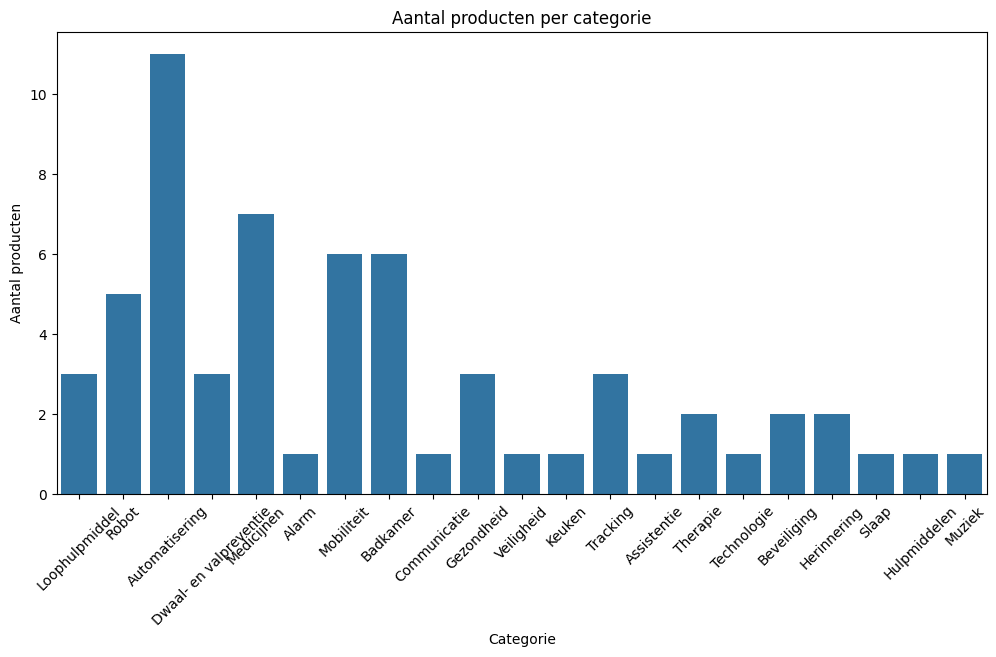

In [92]:
plt.figure(figsize=(12, 6))
sns.countplot(x='categorie', data=data,)
plt.title('Aantal producten per categorie')
plt.xlabel('Categorie')
plt.ylabel('Aantal producten')
plt.xticks(rotation=45)
plt.show()

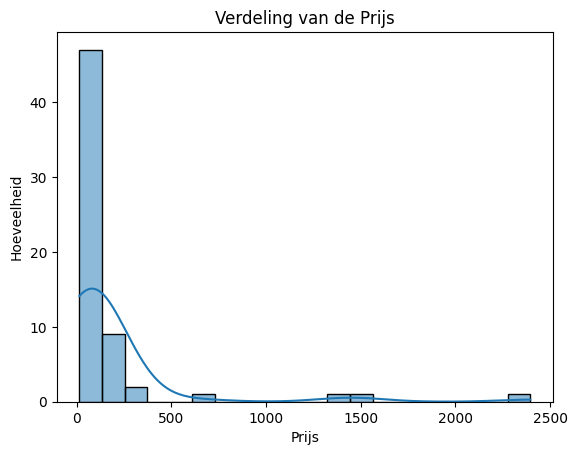

In [85]:
sns.histplot(data['prijs'], bins=20, kde=True)
plt.title('Verdeling van de Prijs')
plt.xlabel('Prijs')
plt.ylabel('Hoeveelheid')
plt.show()

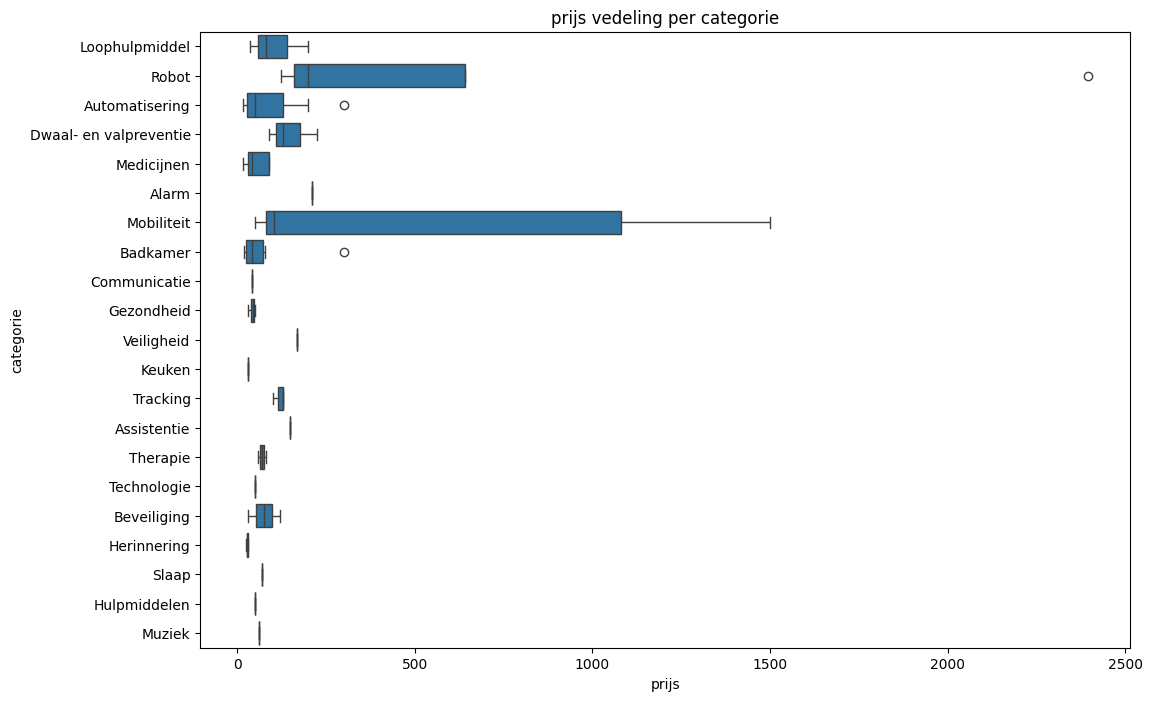

In [89]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='prijs', y='categorie', data=data)
plt.title('prijs vedeling per categorie')
plt.xlabel('prijs')
plt.ylabel('categorie')
plt.show()

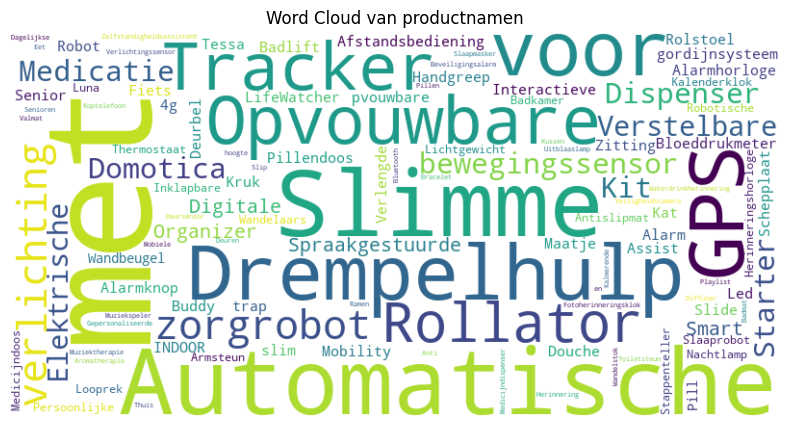

In [88]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['naam']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud van productnamen')
plt.show()


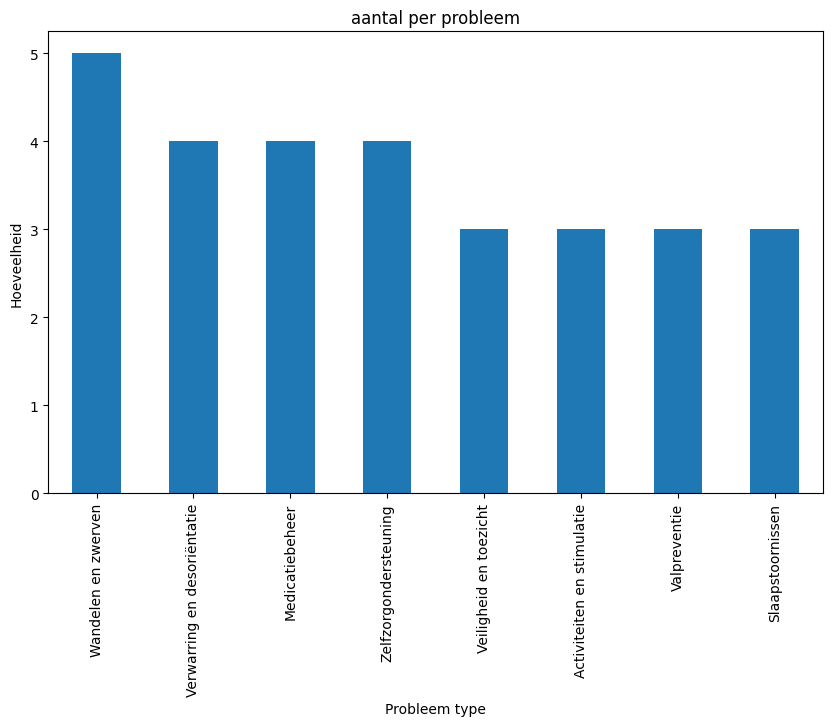

In [91]:
plt.figure(figsize=(10, 6))
problemen['probleem'].value_counts().plot(kind='bar')
plt.title('aantal per probleem')
plt.xlabel('Probleem type')
plt.ylabel('Hoeveelheid')
plt.show()

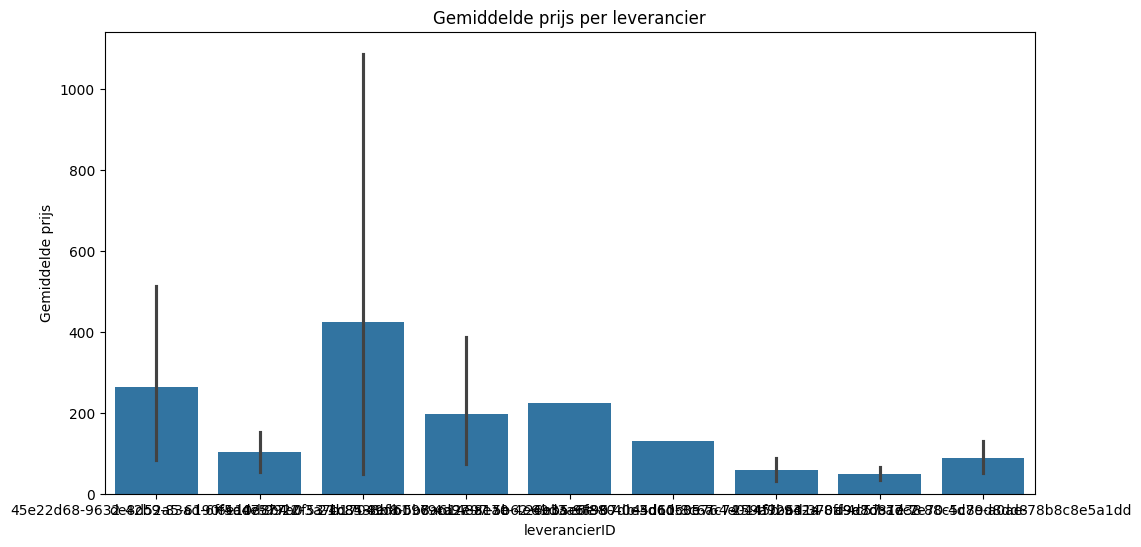

In [93]:
plt.figure(figsize=(12, 6))
sns.barplot(x='leverancierID', y='prijs', data=data)
plt.title('Gemiddelde prijs per leverancier')
plt.xlabel('leverancierID')
plt.ylabel('Gemiddelde prijs')
plt.show()


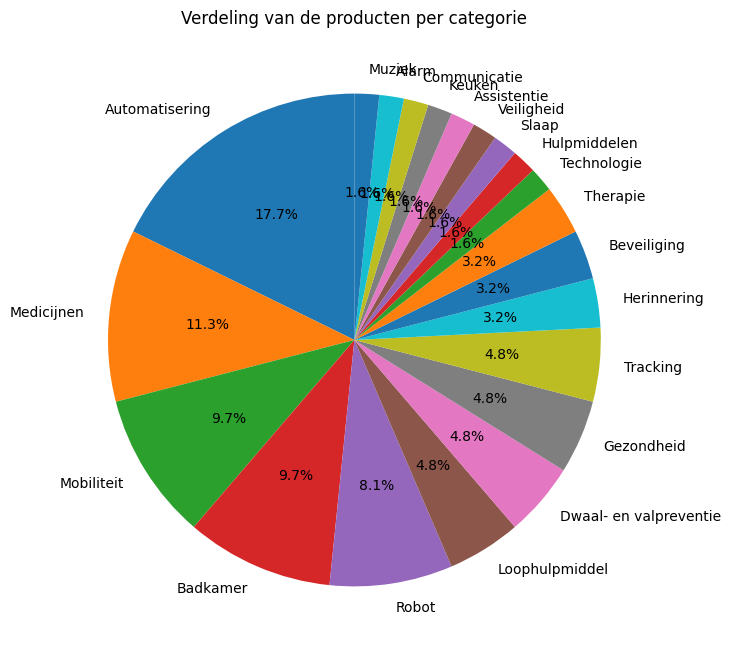

In [94]:
plt.figure(figsize=(8, 8))
data['categorie'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Verdeling van de producten per categorie')
plt.ylabel('')
plt.show()


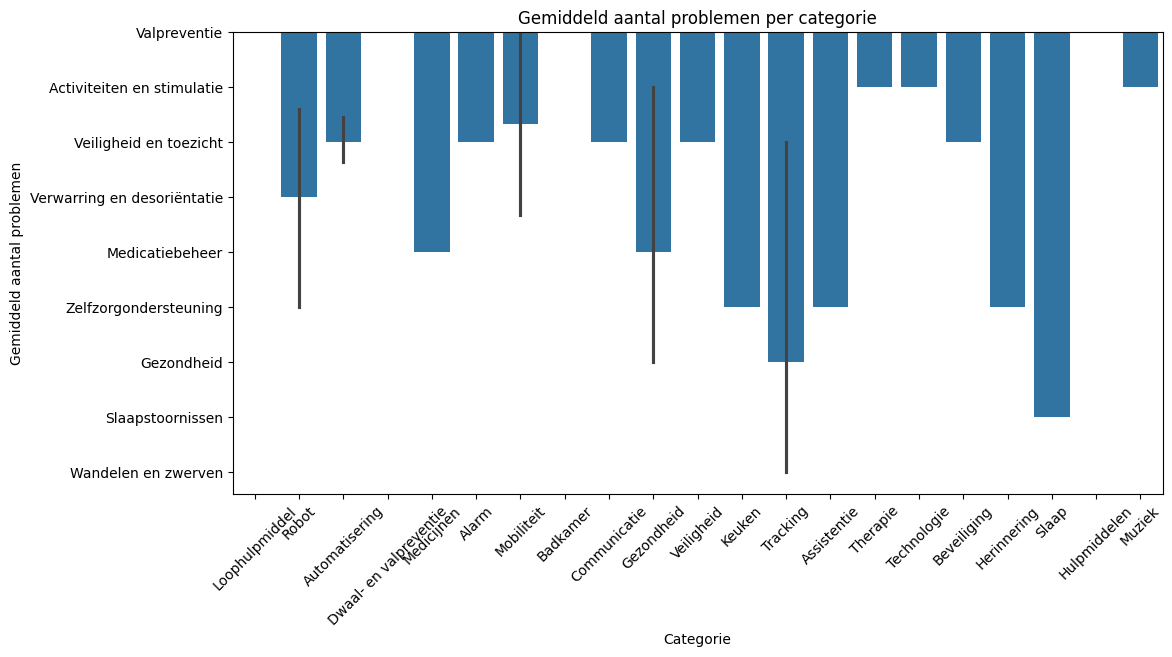

In [98]:
plt.figure(figsize=(12, 6))
sns.barplot(x='categorie', y='probleem', data=data)
plt.title('Gemiddeld aantal problemen per categorie')
plt.xlabel('Categorie')
plt.ylabel('Gemiddeld aantal problemen')
plt.xticks(rotation=45)
plt.show()



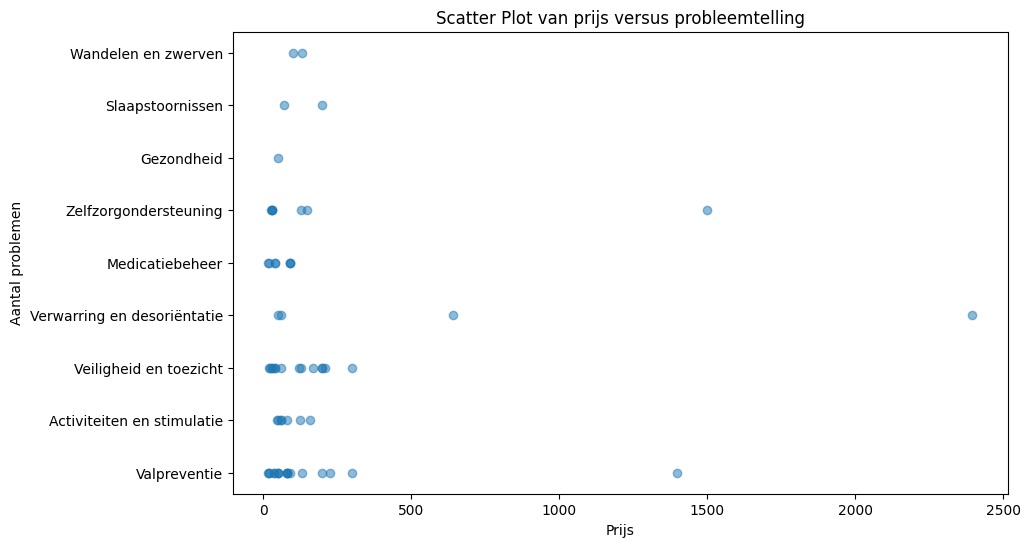

In [103]:
plt.figure(figsize=(10, 6))
plt.scatter(data['prijs'], data['probleem'], alpha=0.5)
plt.title('Scatter Plot van prijs versus probleemtelling')
plt.xlabel('Prijs')
plt.ylabel('Aantal problemen')
plt.show()


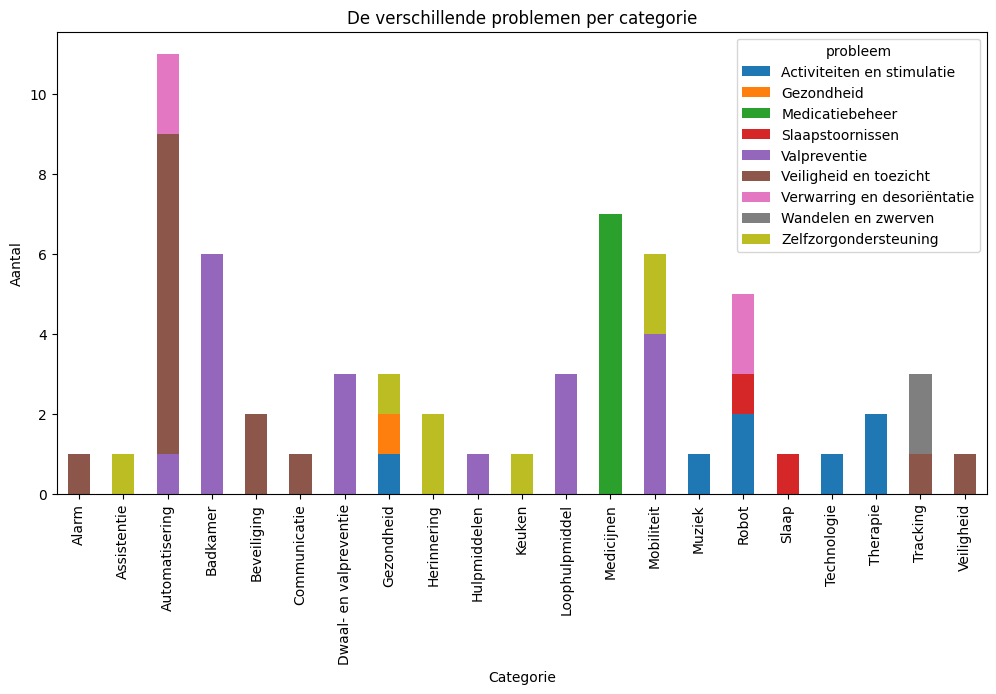

In [115]:
problem_counts = data.groupby('categorie')['probleem'].value_counts().unstack().fillna(0)
problem_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('De verschillende problemen per categorie')
plt.xlabel('Categorie')
plt.ylabel('Aantal')
plt.xticks(rotation=90)
plt.show()
